In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


#### Leemos el dataset

In [47]:
df = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

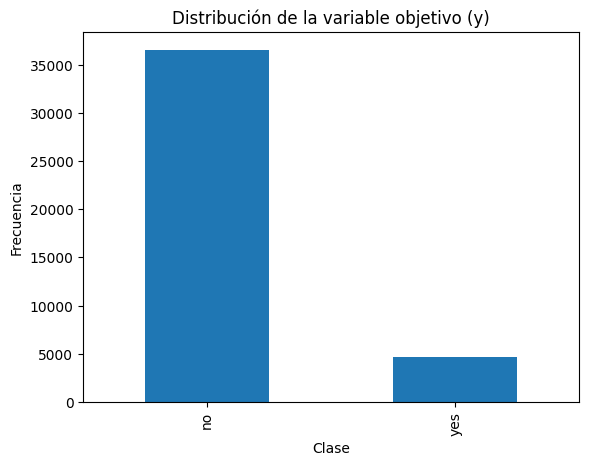

In [48]:
# Dimensiones del DataFrame
df.shape

# Primeras filas
df.head()

# Información general de las columnas
df.info()

# Estadísticas descriptivas (incluyendo variables categóricas)
df.describe(include='all')

# Valores únicos por columna
df.nunique()

# Conteo de valores nulos por columna
df.isnull().sum()

# Distribución de la variable objetivo
df['y'].value_counts()

# Visualización de la variable objetivo

df['y'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable objetivo (y)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

### Conclusión
> Este bloque de código nos permite visualizar, mediante un grafico de barras, cuantos registros hay para cada clase de la variable objetivo 'Y' en mi conjunto de datos.
>
> Es útil para ver si el dataset esta balanceado o si hay más muestras de una clase que de otra. 

###  Análisis de todas las variables de tipo object (categóricas)

Análisis de la variable: job
Valores únicos: 12
Frecuencias:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64




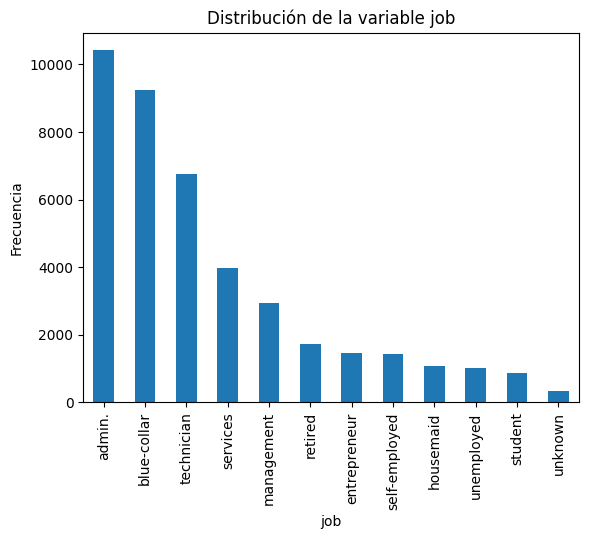

Análisis de la variable: marital
Valores únicos: 4
Frecuencias:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64




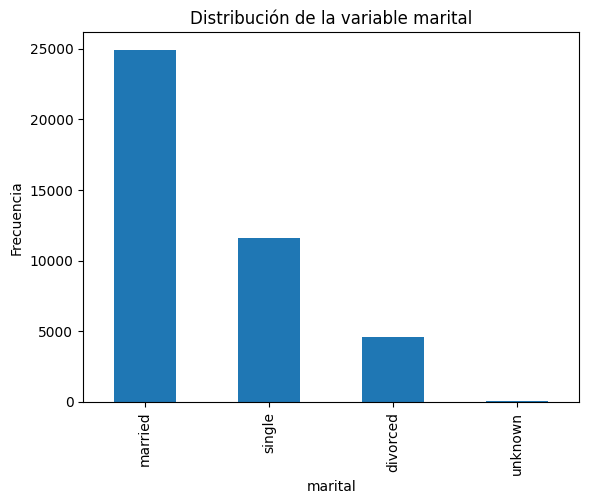

Análisis de la variable: education
Valores únicos: 8
Frecuencias:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64




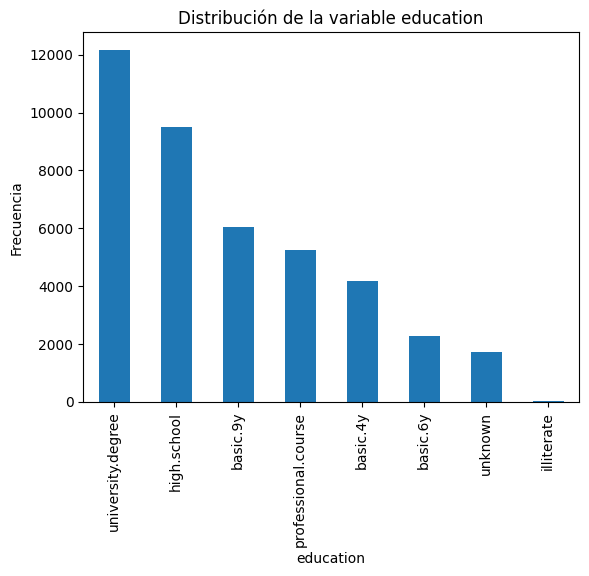

Análisis de la variable: default
Valores únicos: 3
Frecuencias:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64




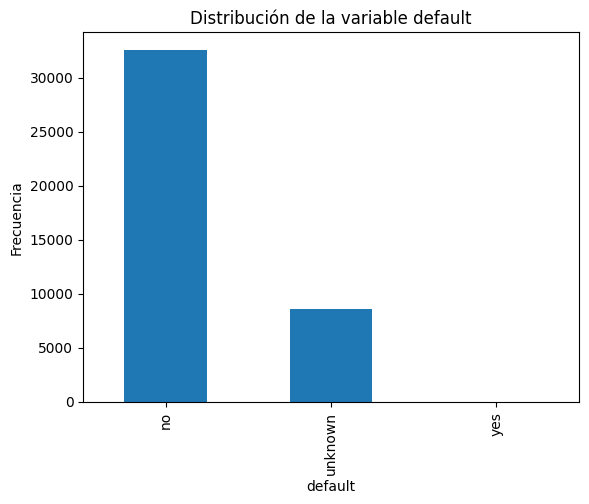

Análisis de la variable: housing
Valores únicos: 3
Frecuencias:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64




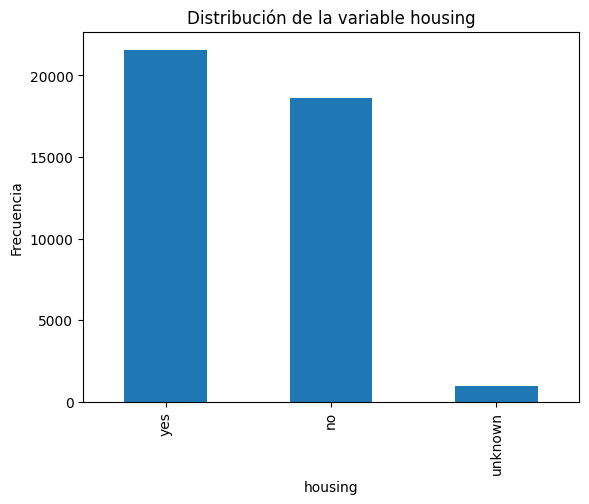

Análisis de la variable: loan
Valores únicos: 3
Frecuencias:
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64




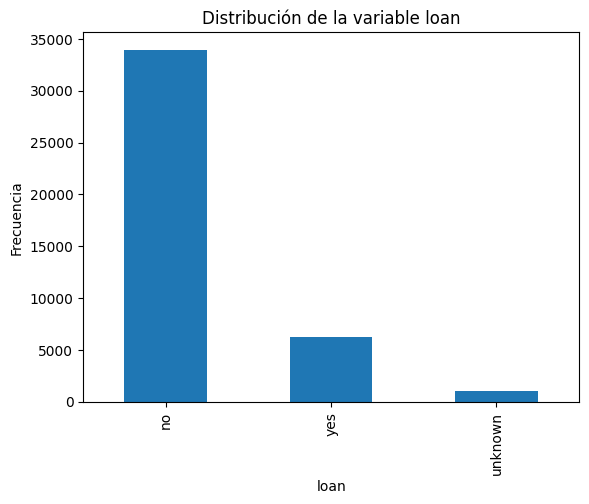

Análisis de la variable: contact
Valores únicos: 2
Frecuencias:
contact
cellular     26144
telephone    15044
Name: count, dtype: int64




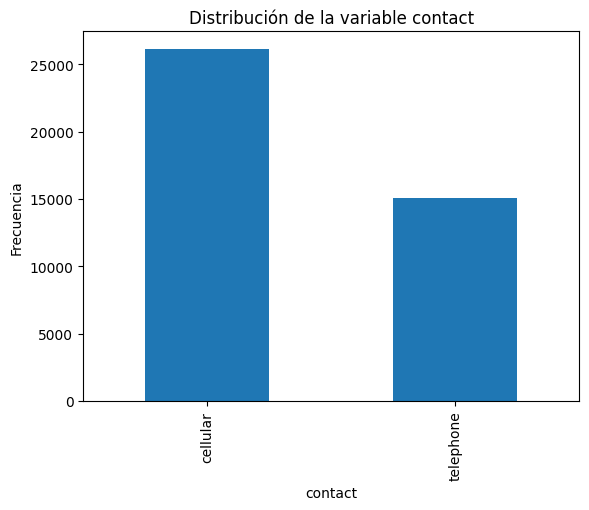

Análisis de la variable: month
Valores únicos: 10
Frecuencias:
month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64




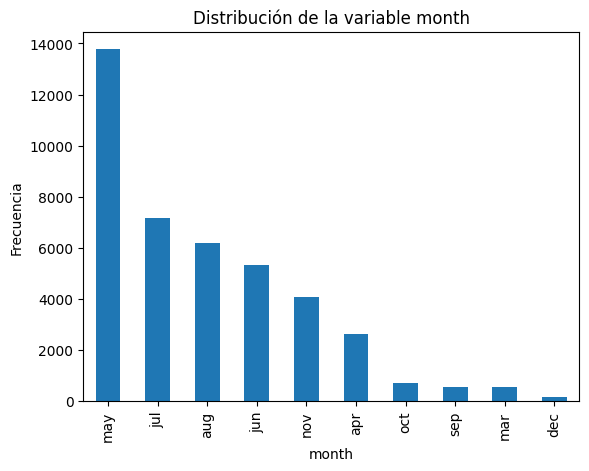

Análisis de la variable: day_of_week
Valores únicos: 5
Frecuencias:
day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64




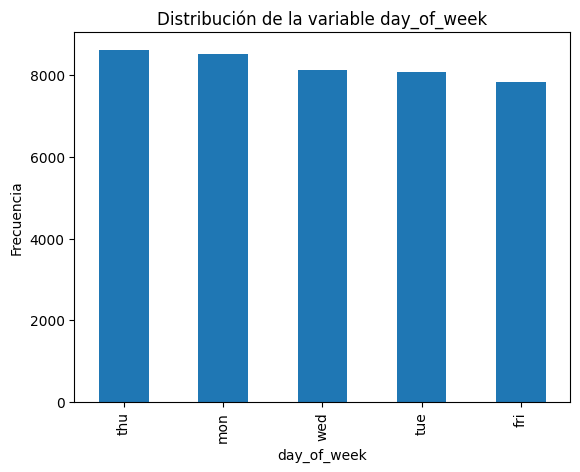

Análisis de la variable: poutcome
Valores únicos: 3
Frecuencias:
poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64




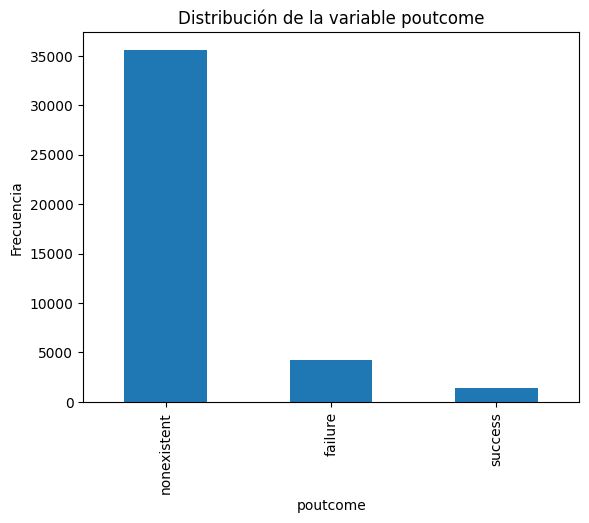

Análisis de la variable: y
Valores únicos: 2
Frecuencias:
y
no     36548
yes     4640
Name: count, dtype: int64




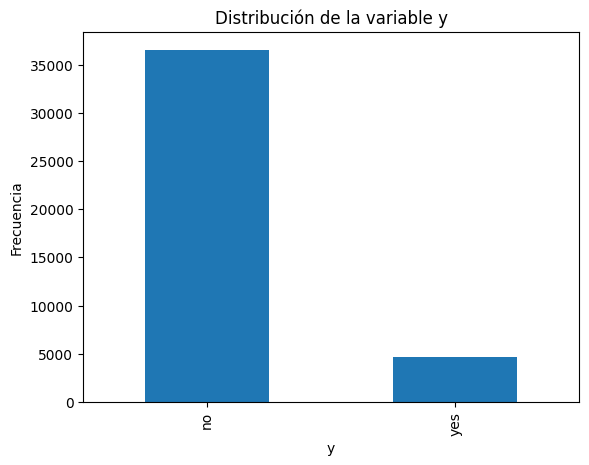

In [49]:

# Selecciona las columnas de tipo object
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    print(f"Análisis de la variable: {col}")
    print("Valores únicos:", df[col].nunique())
    print("Frecuencias:")
    print(df[col].value_counts())
    print("\n")
    # Visualización de la variable si tiene pocos valores únicos
    if df[col].nunique() <= 20:
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribución de la variable {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

### Revisando si tenemos valores nulos

In [50]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


#### Visualización de variables numéricas:  
Con histogramas o boxplots para ver la distribución y detectar posibles outliers.

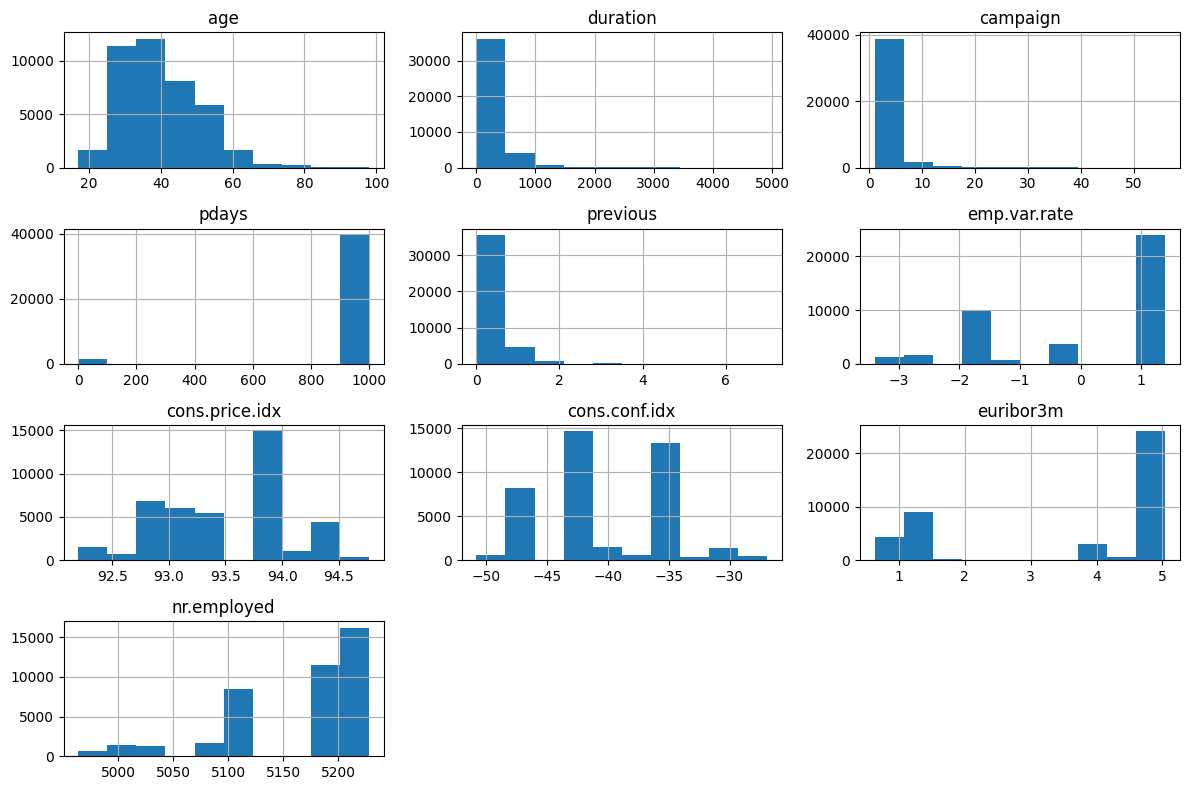

In [52]:
 df.select_dtypes(include=np.number).hist(figsize=(12, 8))
 plt.tight_layout()
 plt.show()

### Análisis de correlación:  
Observa la relación entre variables numéricas.

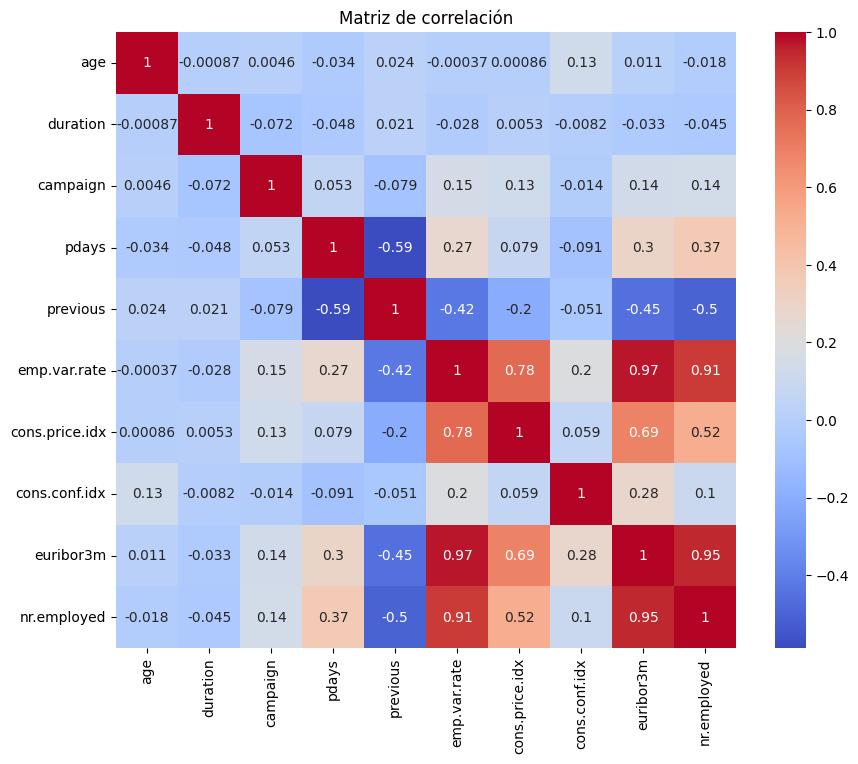

In [53]:

   corr = df.select_dtypes(include=np.number).corr()
   plt.figure(figsize=(10, 8))
   sns.heatmap(corr, annot=True, cmap='coolwarm')
   plt.title('Matriz de correlación')
   plt.show()

#### Preparación de datos para modelado:
   - Codifica variables categóricas.
   - Imputa o elimina valores nulos si es necesario.
   - Escala variables numéricas si el modelo lo requiere.

#### División en conjuntos de entrenamiento y prueba:

In [54]:
X = df.drop('y', axis=1)  
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Entrenamiento y evaluación del modelo:  
- Aplica el modelo de regresión logística 

In [55]:
# Codifica las variables categóricas antes de entrenar el modelo
df_encoded = pd.get_dummies(df, drop_first=True)

# Separa variables predictoras y variable objetivo
X = df_encoded.drop('y_yes', axis=1) 
y = df_encoded['y_yes']

# Divide en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Predicciones y evaluación

y_pred = model.predict(X_test)

print("Matriz de confusión:")
#print(confusion_matrix(y_test, y_pred))
#print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))



Matriz de confusión:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      7303
        True       0.67      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

